In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_original = pd.read_csv('meteo_monthly_all_county_.csv')
df_newvar = pd.read_csv('meteo_monthly_county_newvar.csv')

In [ ]:
df_original = df_original[['County','Year','Month','Max Temp','Min Temp','Avg Temp','Avg Bare Soil Temp',
                     'Avg Turf Soil Temp','Avg Wind Speed','Max Wind Speed','Total Solar Rad',
                     'Total Penman PET', 'Avg Penman PET', 'Total Rainfall',
                     'Avg Dew Point','Avg Wind Chill']]

In [ ]:
df_original.isnull().sum()

County                   0
Year                     0
Month                    0
Max Temp                11
Min Temp                11
Avg Temp                11
Avg Bare Soil Temp      11
Avg Turf Soil Temp      11
Avg Wind Speed          11
Max Wind Speed          11
Total Solar Rad         11
Total Penman PET        11
Avg Penman PET          11
Total Rainfall        5730
Avg Dew Point           11
Avg Wind Chill          11
dtype: int64

In [ ]:
df_newvar.isnull().sum()

County                      0
Year                        0
Month                       0
Consecutive Hot Days        0
Raining Days                0
Consecutive Ranning Days    0
Drying Days                 0
Consecutive Drying Days     0
Rainfall                    0
Hot Days                    0
Wet Days                    0
Consecutive Wet Days        0
dtype: int64

In [ ]:
df_original['County'].unique()

array(['SLOPE', 'GOLDEN VALLEY', 'BURLEIGH', 'BOTTINEAU', 'BURKE',
       'BOWMAN', 'TOWNER', 'FOSTER', 'GRANT', 'PEMBINA', 'GRIGGS',
       'RAMSEY', 'DIVIDE', 'BARNES', 'SHERIDAN', 'STARK', 'DUNN',
       'LAMOURE', 'CASS', 'STEELE', 'WALSH', 'SIOUX', 'BENSON',
       'GRAND FORKS', 'WELLS', 'MERCER', 'ADAMS', 'TRAILL', 'STUTSMAN',
       'MCHENRY', 'CAVALIER', 'EMMONS', 'RANSOM', 'MORTON', 'BILLINGS',
       'NELSON', 'WARD', 'RENVILLE', 'RICHLAND', 'HETTINGER', 'DICKEY',
       'MOUNTRAIL', 'KIDDER', 'ROLETTE', 'PIERCE', 'SARGENT', 'MCLEAN',
       'MCKENZIE', 'WILLIAMS', 'MCINTOSH'], dtype=object)

In [ ]:
df_newvar['County'] = [county.upper() for county in df_newvar['County']]

In [ ]:
df_newvar['County'].unique()

array(['ADAMS', 'BARNES', 'BENSON', 'BILLINGS', 'BOTTINEAU', 'BOWMAN',
       'BURKE', 'BURLEIGH', 'CASS', 'CAVALIER', 'DICKEY', 'DIVIDE',
       'DUNN', 'EDDY', 'EMMONS', 'FOSTER', 'GOLDEN VALLEY', 'GRAND FORKS',
       'GRANT', 'GRIGGS', 'HETTINGER', 'KIDDER', 'LAMOURE', 'LOGAN',
       'MCHENRY', 'MCINTOSH', 'MCKENZIE', 'MCLEAN', 'MERCER', 'MORTON',
       'MOUNTRAIL', 'NELSON', 'PEMBINA', 'PIERCE', 'RAMSEY', 'RANSOM',
       'RENVILLE', 'RICHLAND', 'ROLETTE', 'SARGENT', 'SHERIDAN', 'SIOUX',
       'SLOPE', 'STARK', 'STEELE', 'STUTSMAN', 'TOWNER', 'TRAILL',
       'WALSH', 'WARD', 'WELLS', 'WILLIAMS'], dtype=object)

In [ ]:
df_meteo = pd.merge(df_original, df_newvar, on=['County','Year','Month'])
df_meteo['County'].unique().shape

(50,)

In [ ]:
df_meteo.isnull().sum()

County                         0
Year                           0
Month                          0
Max Temp                      11
Min Temp                      11
Avg Temp                      11
Avg Bare Soil Temp            11
Avg Turf Soil Temp            11
Avg Wind Speed                11
Max Wind Speed                11
Total Solar Rad               11
Total Penman PET              11
Avg Penman PET                11
Total Rainfall              5660
Avg Dew Point                 11
Avg Wind Chill                11
Consecutive Hot Days           0
Raining Days                   0
Consecutive Ranning Days       0
Drying Days                    0
Consecutive Drying Days        0
Rainfall                       0
Hot Days                       0
Wet Days                       0
Consecutive Wet Days           0
dtype: int64

In [ ]:
df_meteo = df_meteo.drop(columns='Total Rainfall', axis =1)
df_meteo = df_meteo.dropna()
df_meteo.isnull().sum()

County                      0
Year                        0
Month                       0
Max Temp                    0
Min Temp                    0
Avg Temp                    0
Avg Bare Soil Temp          0
Avg Turf Soil Temp          0
Avg Wind Speed              0
Max Wind Speed              0
Total Solar Rad             0
Total Penman PET            0
Avg Penman PET              0
Avg Dew Point               0
Avg Wind Chill              0
Consecutive Hot Days        0
Raining Days                0
Consecutive Ranning Days    0
Drying Days                 0
Consecutive Drying Days     0
Rainfall                    0
Hot Days                    0
Wet Days                    0
Consecutive Wet Days        0
dtype: int64

In [ ]:
df_meteo.describe()

,Year,Month,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,...,Avg Wind Chill,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Hot Days,Wet Days,Consecutive Wet Days
count,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,...,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000,13849.000000
mean,2008.931186,6.493610,51.672899,29.614587,40.643980,46.861915,45.442356,8.969089,23.220412,328.853874,...,35.108924,6.695068,1.784244,0.803163,27.507690,20.351000,1.235974,12.863672,20.359737,12.813922
std,8.889630,3.463056,23.041120,20.412323,21.660531,18.122257,16.366041,1.718158,3.019533,160.202985,...,26.451498,4.435845,2.229492,0.911502,3.210813,9.526055,1.630667,6.141050,7.957334,8.747111
min,1990.000000,1.000000,-1.428000,-19.332000,-9.125000,3.227000,8.593000,2.287000,4.429000,63.835000,...,-25.327000,0.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,3.000000,30.663000,12.326000,21.540000,30.389000,30.539000,7.808000,21.181000,164.991000,...,11.773000,4.000000,0.000000,0.000000,25.000000,11.000000,0.000000,8.000000,14.000000,6.000000
50%,2010.000000,6.000000,53.994000,30.704000,42.188000,43.987000,43.435000,8.965000,23.124000,333.594000,...,36.948000,6.000000,1.000000,1.000000,28.000000,20.000000,0.551000,13.000000,22.000000,10.000000
75%,2017.000000,10.000000,73.322000,48.850000,61.119000,64.098000,61.173000,10.077000,25.190000,471.932000,...,60.681000,9.000000,3.000000,1.000000,31.000000,31.000000,2.010000,17.000000,27.000000,18.000000
max,2023.000000,12.000000,93.447000,65.534000,77.689000,85.268000,81.176000,16.440000,38.212000,673.287000,...,77.343000,31.000000,13.000000,6.000000,31.000000,31.000000,12.110000,31.000000,31.000000,31.000000


In [ ]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849 entries, 0 to 13859
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   County                    13849 non-null  object 
 1   Year                      13849 non-null  int64  
 2   Month                     13849 non-null  int64  
 3   Max Temp                  13849 non-null  float64
 4   Min Temp                  13849 non-null  float64
 5   Avg Temp                  13849 non-null  float64
 6   Avg Bare Soil Temp        13849 non-null  float64
 7   Avg Turf Soil Temp        13849 non-null  float64
 8   Avg Wind Speed            13849 non-null  float64
 9   Max Wind Speed            13849 non-null  float64
 10  Total Solar Rad           13849 non-null  float64
 11  Total Penman PET          13849 non-null  float64
 12  Avg Penman PET            13849 non-null  float64
 13  Avg Dew Point             13849 non-null  float64
 14  Avg Wi

In [ ]:
df_meteo['Time'] = df_meteo['Month'].map(str)+ '-' + df_meteo['Year'].map(str)
df_meteo['Time'] = pd.to_datetime(df_meteo['Time'], format='%m-%Y').dt.strftime('%m-%Y')
df_meteo = df_meteo.drop(columns = ['Year','Month'])
column_to_move = df_meteo.pop('Time')
df_meteo.insert(1, 'Time', column_to_move)
column_to_move = df_meteo.pop("Hot Days")
df_meteo.insert(14, 'Hot Days', column_to_move)
# df_meteo = df_meteo[['County','Time','Max Temp','Min Temp','Avg Temp','Avg Bare Soil Temp',
#                      'Avg Turf Soil Temp','Avg Wind Speed','Max Wind Speed','Total Solar Rad',
#                      'Total Penman PET', 'Avg Penman PET', 'Rainfall',
#                      'Avg Dew Point','Avg Wind Chill']]
df_meteo

,County,Time,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,...,Avg Wind Chill,Hot Days,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Wet Days,Consecutive Wet Days
0,SLOPE,09-2019,70.377,45.771,58.074,60.908,59.874,7.731,25.025,308.761,...,56.721,14,7,8,4,18,6,5.346,18,7
1,SLOPE,10-2019,47.054,25.940,36.497,40.222,42.023,9.570,26.123,221.131,...,29.144,6,3,4,2,26,14,1.738,18,5
2,SLOPE,11-2019,38.102,18.333,28.217,33.080,33.933,7.834,23.313,139.173,...,21.766,14,6,0,0,30,30,0.000,27,21
3,SLOPE,12-2019,33.246,15.826,24.536,31.501,32.356,7.637,19.481,109.875,...,16.547,25,10,0,0,31,31,0.000,26,12
4,SLOPE,01-2020,29.239,10.557,19.898,26.477,27.885,8.639,25.982,124.369,...,10.174,23,12,0,0,31,31,0.000,26,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,MCINTOSH,12-2022,15.319,0.415,7.867,24.655,24.032,12.395,27.684,126.458,...,-7.637,12,6,0,0,31,31,0.000,31,31
13856,MCINTOSH,01-2023,21.003,5.360,13.182,24.973,24.853,8.684,20.180,160.581,...,1.567,17,6,0,0,29,12,0.589,31,31
13857,MCINTOSH,02-2023,23.586,4.375,13.981,24.443,25.310,13.204,28.887,268.855,...,-0.019,14,11,2,1,24,20,0.845,27,26
13858,MCINTOSH,03-2023,21.489,5.135,13.312,25.116,25.338,12.402,25.967,409.899,...,-0.217,0,0,5,2,24,10,2.201,31,31


## Focus on 3 regions of North Dakota: North, Center and South.
## For each region, I find the county which has the most historical data to fit to the predict model

In [ ]:
df_meteo = df_meteo[df_meteo['County'].isin(['WELLS','CASS','BOTTINEAU'])]
df_meteo

,County,Time,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,...,Avg Wind Chill,Hot Days,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Wet Days,Consecutive Wet Days
461,BOTTINEAU,01-1993,13.318,-11.012,1.153,25.482,19.793,9.357,20.533,137.219,...,-12.643,9,4,0,0,31,31,0.000,28,16
462,BOTTINEAU,02-1993,16.605,-4.278,6.163,23.552,19.427,6.894,15.443,240.559,...,-5.773,7,2,0,0,28,28,0.000,26,15
463,BOTTINEAU,03-1993,34.102,14.636,24.369,28.770,14.153,8.640,19.007,306.294,...,14.521,12,4,0,0,31,31,0.000,27,14
464,BOTTINEAU,04-1993,53.583,28.497,41.040,40.803,33.700,8.324,20.946,414.197,...,35.623,11,3,0,0,28,15,0.430,14,9
465,BOTTINEAU,05-1993,68.343,39.534,53.939,55.379,51.179,9.189,25.194,485.463,...,53.427,10,4,1,1,27,13,1.000,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,WELLS,12-2022,12.761,-4.363,4.199,31.193,29.139,9.525,22.835,111.981,...,-8.676,7,3,0,0,31,31,0.000,31,31
6196,WELLS,01-2023,19.935,1.224,10.580,32.599,30.992,7.053,18.566,134.356,...,1.320,15,4,0,0,31,31,0.060,31,31
6197,WELLS,02-2023,21.837,0.917,11.377,31.522,28.303,9.757,25.195,248.376,...,-0.036,14,11,0,0,28,28,0.012,27,26
6198,WELLS,03-2023,20.814,0.049,10.432,30.270,27.476,9.119,22.055,385.170,...,0.064,0,0,0,0,31,31,0.028,30,25


#Use ARIMA to forecast

## Visualization the performance of ARIMA

In [ ]:
df_meteo_show = df_meteo[df_meteo['County']=="BOTTINEAU"]

In [ ]:
df_meteo_show.describe().loc['max']

Max Temp                     86.682
Min Temp                     56.828
Avg Temp                     71.607
Avg Bare Soil Temp           77.933
Avg Turf Soil Temp           70.072
Avg Wind Speed               13.721
Max Wind Speed               31.805
Total Solar Rad             612.518
Total Penman PET              9.623
Avg Penman PET                0.321
Avg Dew Point                61.478
Avg Wind Chill               71.544
Hot Days                     27.000
Consecutive Hot Days         23.000
Raining Days                 11.000
Consecutive Ranning Days      5.000
Drying Days                  31.000
Consecutive Drying Days      31.000
Rainfall                     12.110
Wet Days                     31.000
Consecutive Wet Days         31.000
Name: max, dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

Root Mean Squared Error for Max Temp: 6.064653210194959


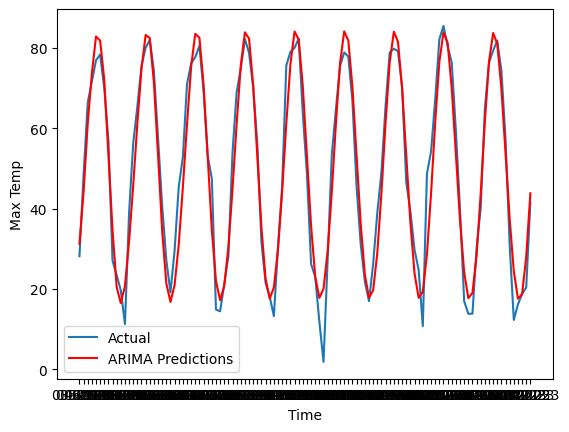

Future Predictions for Max Temp: 2014-03-01    31.204194
Freq: MS, dtype: float64
Root Mean Squared Error for Min Temp: 5.2802839741026855


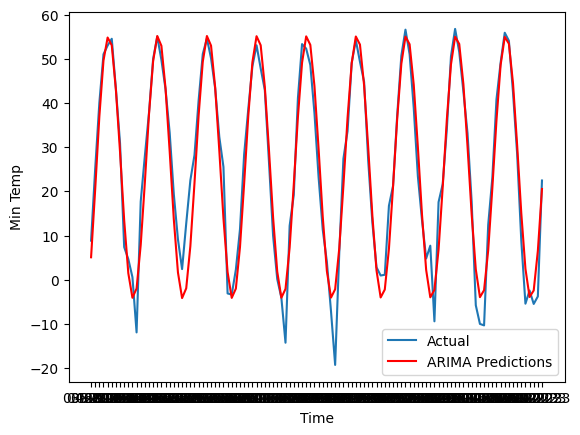

Future Predictions for Min Temp: 2014-03-01    5.065554
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Temp: 5.400654332744229


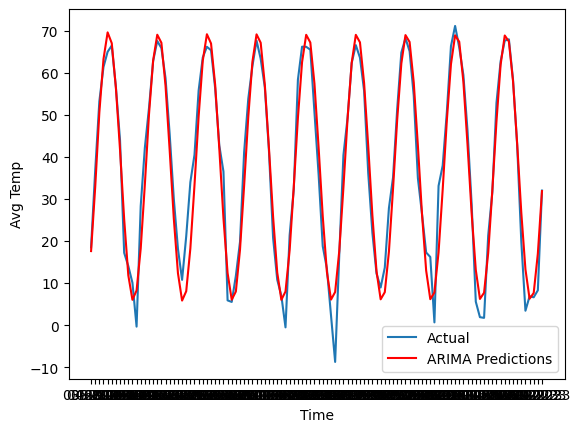

Future Predictions for Avg Temp: 2014-03-01    17.600864
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Bare Soil Temp: 2.916477446579983


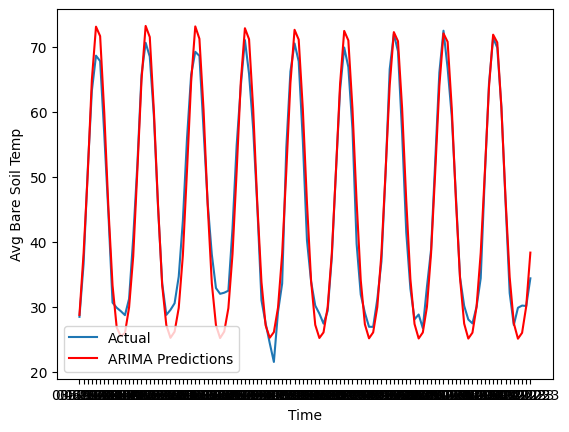

Future Predictions for Avg Bare Soil Temp: 2014-03-01    28.791125
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Turf Soil Temp: 2.288893476841152


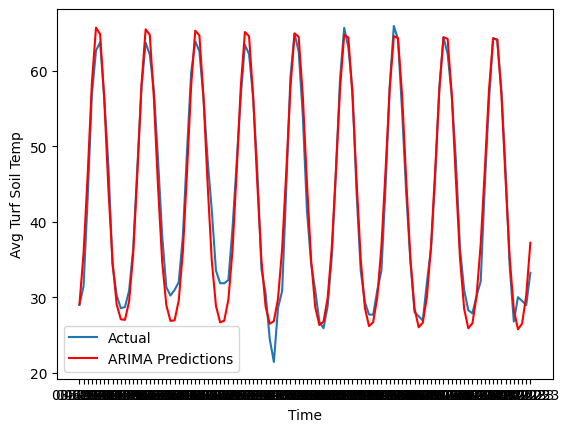

Future Predictions for Avg Turf Soil Temp: 2014-03-01    29.048274
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Wind Speed: 1.3139461644283827


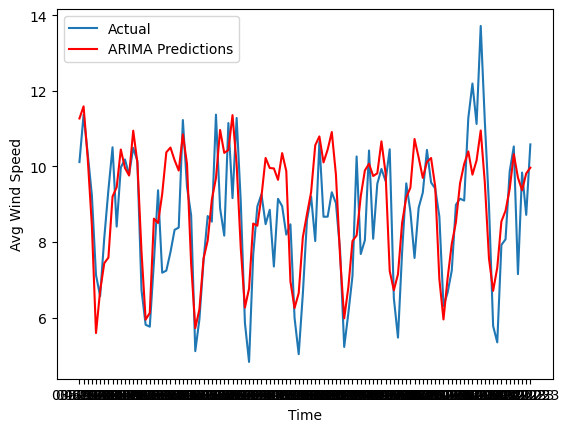

Future Predictions for Avg Wind Speed: 2014-03-01    11.271165
Freq: MS, dtype: float64
Root Mean Squared Error for Max Wind Speed: 2.6543168358505302


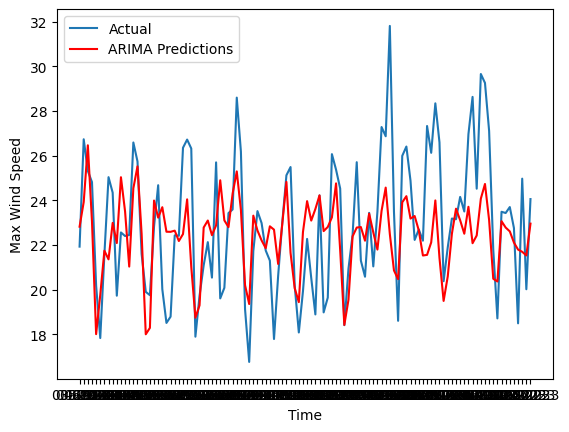

Future Predictions for Max Wind Speed: 2014-03-01    22.813476
Freq: MS, dtype: float64
Root Mean Squared Error for Total Solar Rad: 30.82049035740218


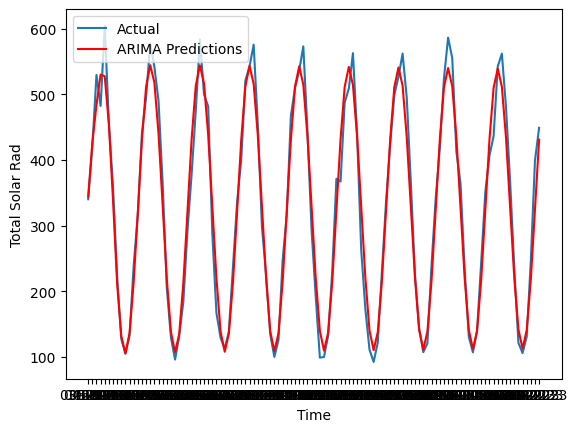

Future Predictions for Total Solar Rad: 2014-03-01    344.287173
Freq: MS, dtype: float64
Root Mean Squared Error for Total Penman PET: 0.9896548920462881


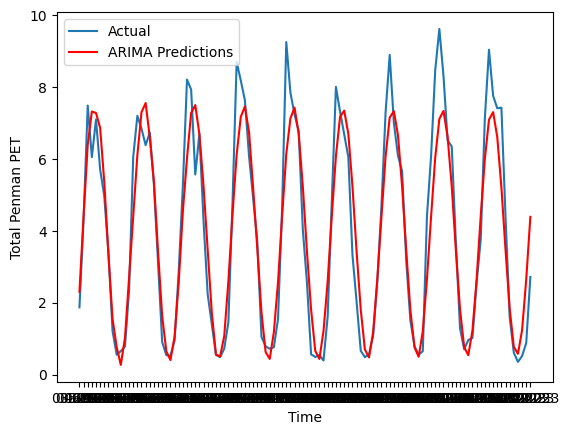

Future Predictions for Total Penman PET: 2014-03-01    2.306527
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Penman PET: 0.047792605125866784


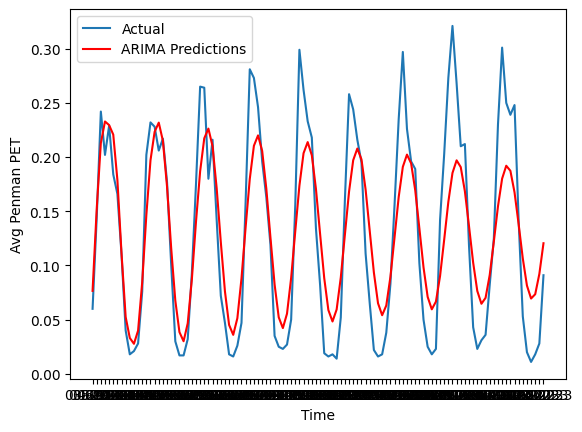

Future Predictions for Avg Penman PET: 2014-03-01    0.076544
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Dew Point: 5.1847601241375205


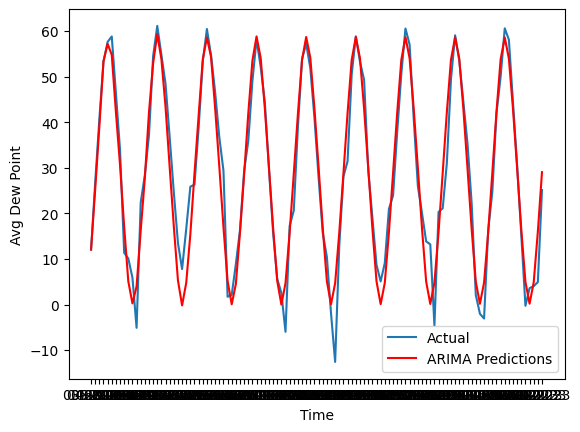

Future Predictions for Avg Dew Point: 2014-03-01    12.065921
Freq: MS, dtype: float64
Root Mean Squared Error for Avg Wind Chill: 6.641979179612222


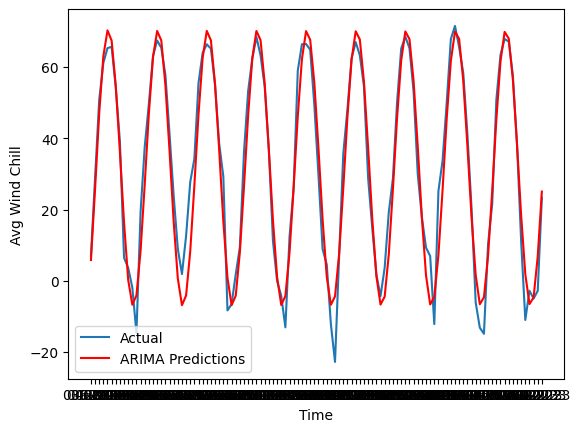

Future Predictions for Avg Wind Chill: 2014-03-01    5.841899
Freq: MS, dtype: float64
Root Mean Squared Error for Hot Days: 5.829345622560996


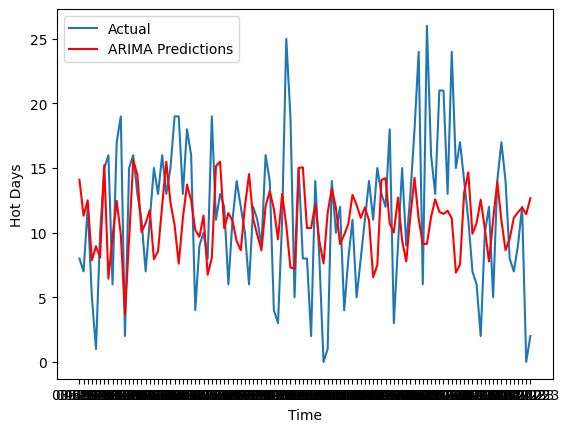

Future Predictions for Hot Days: 2014-03-01    14.092795
Freq: MS, dtype: float64
Root Mean Squared Error for Consecutive Hot Days: 3.83845148691165


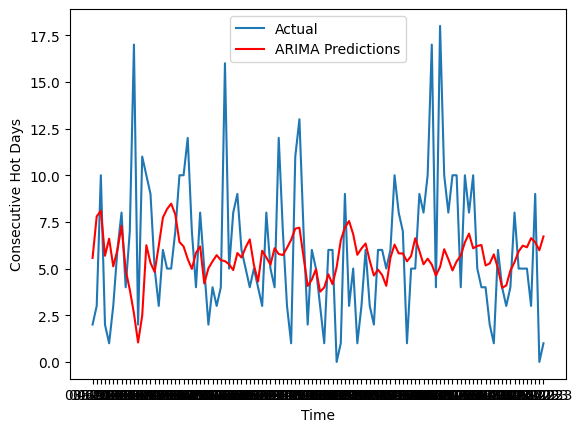

Future Predictions for Consecutive Hot Days: 2014-03-01    5.571149
Freq: MS, dtype: float64
Root Mean Squared Error for Raining Days: 1.2617589238959848


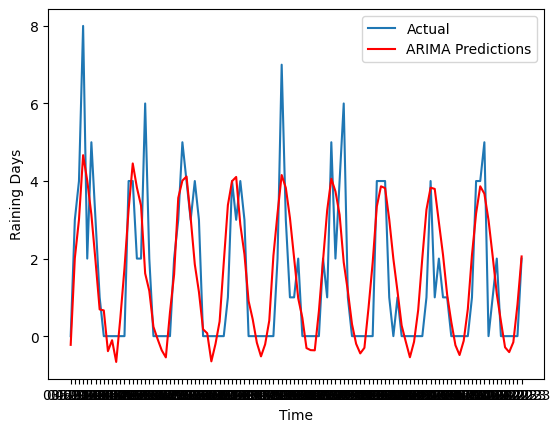

Future Predictions for Raining Days: 2014-03-01   -0.224584
Freq: MS, dtype: float64
Root Mean Squared Error for Consecutive Ranning Days: 0.5960404997690116


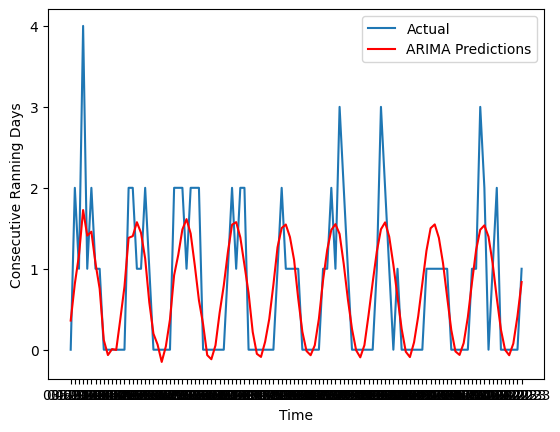

Future Predictions for Consecutive Ranning Days: 2014-03-01    0.360072
Freq: MS, dtype: float64
Root Mean Squared Error for Drying Days: 2.057825649844114


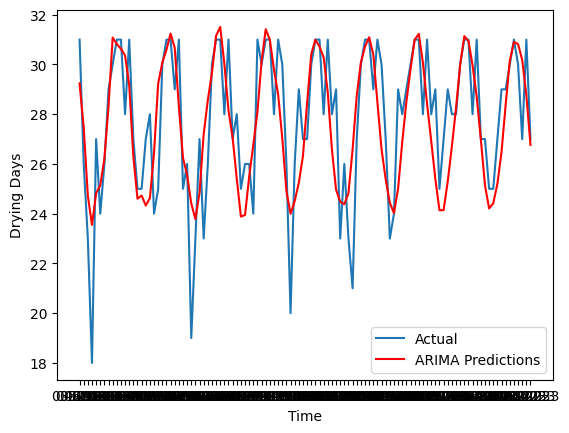

Future Predictions for Drying Days: 2014-03-01    29.239838
Freq: MS, dtype: float64
Root Mean Squared Error for Consecutive Drying Days: 4.780340997738432


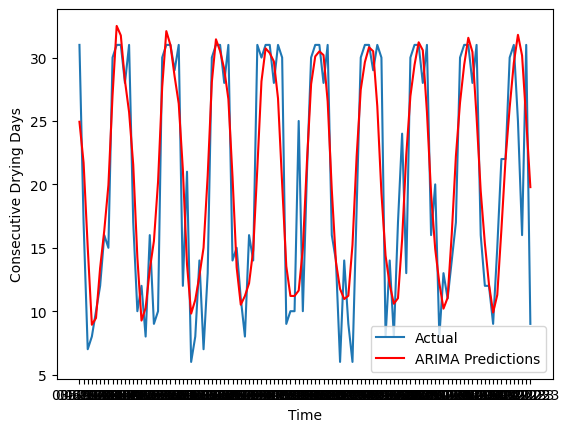

Future Predictions for Consecutive Drying Days: 2014-03-01    24.937606
Freq: MS, dtype: float64
Root Mean Squared Error for Rainfall: 0.9832296605052877


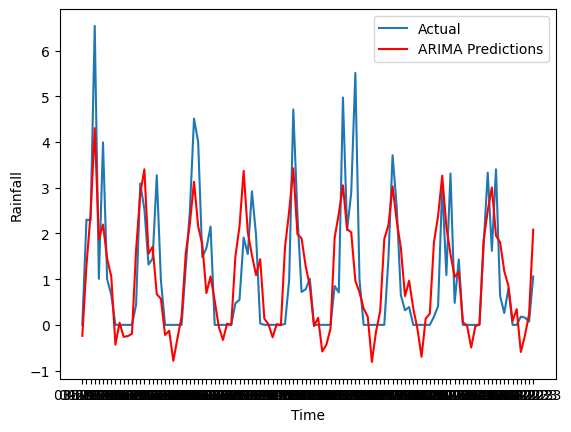

Future Predictions for Rainfall: 2014-03-01   -0.239442
Freq: MS, dtype: float64
Root Mean Squared Error for Wet Days: 6.099516535331316


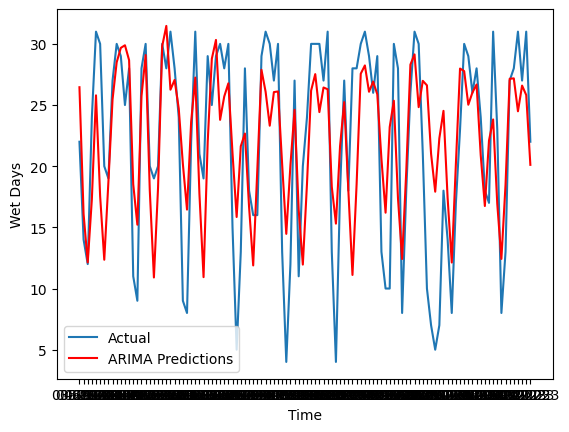

Future Predictions for Wet Days: 2014-03-01    26.455784
Freq: MS, dtype: float64
Root Mean Squared Error for Consecutive Wet Days: 7.583404343873111


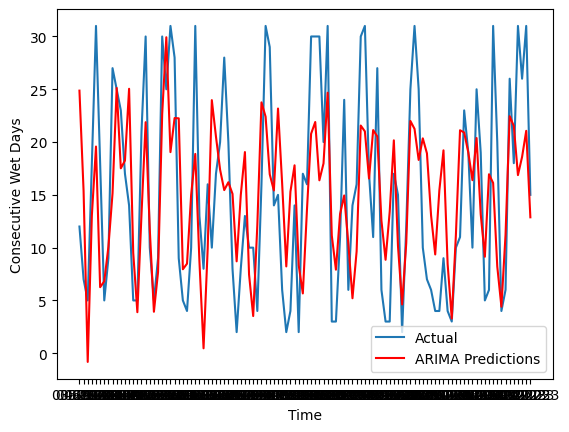

Future Predictions for Consecutive Wet Days: 2014-03-01    24.870937
Freq: MS, dtype: float64


In [ ]:
# Iterate through each column (excluding the time column)
time_column = 'Time'
for column in df_meteo_show.columns[2:]:
    # Extract the time series data
    time_series = df_meteo_show.set_index(time_column)[column]

    # Split the data into training and testing sets
    train_size = int(len(time_series) * 0.7)
    train, test = time_series[:train_size], time_series[train_size:]

    unseasonal_columns = ['Rainfall','Avg Wind Speed','Max Wind Speed','Hot Days','Consecutive Hot Days','Wet Days','Consecutive Wet Days']

    # Train the ARIMA model
    if column in unseasonal_columns:
      order = (40, 0, 20)
    else:
      order = (9,0,6)

    model = ARIMA(train, order=order)
    fit_model = model.fit()

    # Make predictions on the test set
    predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    #predictions.append(yhat)
    # Evaluate the model
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    print(f'Root Mean Squared Error for {column}: {rmse}')
    # Plot actual vs. predicted values
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, predictions, color='red', label='ARIMA Predictions')
    plt.xlabel(time_column)
    plt.ylabel(column)
    plt.legend()
    plt.show()

    future_predictions = fit_model.forecast()
    print(f"Future Predictions for {column}:", future_predictions)

In [ ]:
df_meteo_show.set_index(time_column)["Hot Days"]

Time
01-1993     9
02-1993     7
03-1993    12
04-1993    11
05-1993    10
           ..
12-2022     7
01-2023     9
02-2023    12
03-2023     0
04-2023     2
Name: Hot Days, Length: 364, dtype: int64

## Loop through these 3 counties and export future dataset

In [ ]:
time_column = 'Time'
future_data = pd.DataFrame()
for county in df_meteo['County'].unique():
  print(county)
  df_meteo_future = df_meteo[df_meteo['County']==county]
  temporary_df = pd.DataFrame()
  for column in df_meteo_future.columns[2:]:
    # Extract the time series data
    time_series = df_meteo_future.set_index(time_column)[column]
    # Train the ARIMA model
    unseasonal_columns = ['Rainfall','Avg Wind Speed','Max Wind Speed','Hot Days','Consecutive Hot Days','Wet Days','Consecutive Wet Days']

    # Train the ARIMA model
    if column in unseasonal_columns:
      order = (40, 0, 20)
    else:
      order = (9,0,6)

    model = ARIMA(time_series, order=order)
    fit_model = model.fit()
    future_predictions = fit_model.forecast(steps = 348)
    # Store the predictions in the 'predicted_data' DataFrame
    temporary_df['County'] = county
    temporary_df['Time'] = future_predictions.index
    temporary_df[column] = future_predictions.values
  future_data = future_data.append(temporary_df)

BOTTINEAU
CASS
WELLS


In [ ]:
test_df = future_data.copy()
test_df

,County,Time,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,...,Avg Wind Chill,Hot Days,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Wet Days,Consecutive Wet Days
0,BOTTINEAU,2023-05-01,63.385667,36.671349,49.645972,49.050739,43.253533,10.093931,27.132438,511.327270,...,47.390438,9.807268,7.618287,2.590455,1.137292,25.960852,16.320797,0.719994,13.727254,7.857198
1,BOTTINEAU,2023-06-01,76.873443,48.965887,63.268620,63.437317,55.086255,8.414754,23.178906,543.721956,...,63.448895,10.207413,3.583322,3.815127,1.538396,23.140982,8.810354,2.951436,17.784533,8.614050
2,BOTTINEAU,2023-07-01,83.960794,54.663812,69.198605,71.447702,64.143425,5.631389,19.024290,516.175983,...,70.075699,6.138706,3.471502,3.323702,1.581298,25.290220,10.426980,2.217654,27.559443,20.125287
3,BOTTINEAU,2023-08-01,82.214033,51.734484,66.713650,69.388579,65.218088,4.927782,18.646150,422.848978,...,67.077491,7.563438,4.780313,3.034681,1.492595,26.785445,13.392132,2.124156,20.885642,13.253694
4,BOTTINEAU,2023-09-01,70.096244,42.178337,56.744662,58.656478,57.804353,7.259576,20.298088,322.630530,...,53.696156,15.258270,5.100626,2.039047,1.184924,27.055132,18.261506,1.716256,13.703744,2.367938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,WELLS,2051-12-01,25.762067,7.025753,16.160776,29.982173,30.672809,9.030806,23.547402,124.725660,...,4.973147,12.002758,6.116545,0.399921,0.004441,27.964198,28.998983,0.506181,24.683822,19.602505
344,WELLS,2052-01-01,19.705609,1.979052,10.409273,25.909825,25.493757,9.002080,21.878108,156.481245,...,-2.530888,13.436255,6.924096,0.096872,-0.117525,27.929384,31.648711,0.160889,26.351097,18.116066
345,WELLS,2052-02-01,22.113972,4.145883,12.454387,26.761975,24.130230,9.329549,21.390370,234.419740,...,-0.003415,12.963840,5.980123,0.244365,0.221363,27.756730,30.422090,1.079982,25.139908,16.030285
346,WELLS,2052-03-01,32.341838,12.950904,22.032598,32.714276,27.739673,10.028369,22.331044,337.626599,...,11.795939,11.658743,6.880980,0.801233,0.492564,27.556118,24.529451,0.886049,22.868266,14.823156


In [ ]:
round_df = test_df[test_df.columns[14:]].round()
test_df.update(round_df)
test_df

,County,Time,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,...,Avg Wind Chill,Hot Days,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Wet Days,Consecutive Wet Days
0,BOTTINEAU,2023-05-01,63.385667,36.671349,49.645972,49.050739,43.253533,10.093931,27.132438,511.327270,...,47.390438,10.0,8.0,3.0,1.0,26.0,16.0,1.0,14.0,8.0
1,BOTTINEAU,2023-06-01,76.873443,48.965887,63.268620,63.437317,55.086255,8.414754,23.178906,543.721956,...,63.448895,10.0,4.0,4.0,2.0,23.0,9.0,3.0,18.0,9.0
2,BOTTINEAU,2023-07-01,83.960794,54.663812,69.198605,71.447702,64.143425,5.631389,19.024290,516.175983,...,70.075699,6.0,3.0,3.0,2.0,25.0,10.0,2.0,28.0,20.0
3,BOTTINEAU,2023-08-01,82.214033,51.734484,66.713650,69.388579,65.218088,4.927782,18.646150,422.848978,...,67.077491,8.0,5.0,3.0,1.0,27.0,13.0,2.0,21.0,13.0
4,BOTTINEAU,2023-09-01,70.096244,42.178337,56.744662,58.656478,57.804353,7.259576,20.298088,322.630530,...,53.696156,15.0,5.0,2.0,1.0,27.0,18.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,WELLS,2051-12-01,25.762067,7.025753,16.160776,29.982173,30.672809,9.030806,23.547402,124.725660,...,4.973147,12.0,6.0,0.0,0.0,28.0,29.0,1.0,25.0,20.0
344,WELLS,2052-01-01,19.705609,1.979052,10.409273,25.909825,25.493757,9.002080,21.878108,156.481245,...,-2.530888,13.0,7.0,0.0,-0.0,28.0,32.0,0.0,26.0,18.0
345,WELLS,2052-02-01,22.113972,4.145883,12.454387,26.761975,24.130230,9.329549,21.390370,234.419740,...,-0.003415,13.0,6.0,0.0,0.0,28.0,30.0,1.0,25.0,16.0
346,WELLS,2052-03-01,32.341838,12.950904,22.032598,32.714276,27.739673,10.028369,22.331044,337.626599,...,11.795939,12.0,7.0,1.0,0.0,28.0,25.0,1.0,23.0,15.0


In [ ]:
columns_to_check = test_df.columns[5:12]
test_df[columns_to_check] = np.maximum(test_df[columns_to_check],0)
test_df

,County,Time,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,...,Avg Wind Chill,Hot Days,Consecutive Hot Days,Raining Days,Consecutive Ranning Days,Drying Days,Consecutive Drying Days,Rainfall,Wet Days,Consecutive Wet Days
0,BOTTINEAU,2023-05-01,63.385667,36.671349,49.645972,49.050739,43.253533,10.093931,27.132438,511.327270,...,47.390438,10.0,8.0,3.0,1.0,26.0,16.0,1.0,14.0,8.0
1,BOTTINEAU,2023-06-01,76.873443,48.965887,63.268620,63.437317,55.086255,8.414754,23.178906,543.721956,...,63.448895,10.0,4.0,4.0,2.0,23.0,9.0,3.0,18.0,9.0
2,BOTTINEAU,2023-07-01,83.960794,54.663812,69.198605,71.447702,64.143425,5.631389,19.024290,516.175983,...,70.075699,6.0,3.0,3.0,2.0,25.0,10.0,2.0,28.0,20.0
3,BOTTINEAU,2023-08-01,82.214033,51.734484,66.713650,69.388579,65.218088,4.927782,18.646150,422.848978,...,67.077491,8.0,5.0,3.0,1.0,27.0,13.0,2.0,21.0,13.0
4,BOTTINEAU,2023-09-01,70.096244,42.178337,56.744662,58.656478,57.804353,7.259576,20.298088,322.630530,...,53.696156,15.0,5.0,2.0,1.0,27.0,18.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,WELLS,2051-12-01,25.762067,7.025753,16.160776,29.982173,30.672809,9.030806,23.547402,124.725660,...,4.973147,12.0,6.0,0.0,0.0,28.0,29.0,1.0,25.0,20.0
344,WELLS,2052-01-01,19.705609,1.979052,10.409273,25.909825,25.493757,9.002080,21.878108,156.481245,...,-2.530888,13.0,7.0,0.0,-0.0,28.0,32.0,0.0,26.0,18.0
345,WELLS,2052-02-01,22.113972,4.145883,12.454387,26.761975,24.130230,9.329549,21.390370,234.419740,...,-0.003415,13.0,6.0,0.0,0.0,28.0,30.0,1.0,25.0,16.0
346,WELLS,2052-03-01,32.341838,12.950904,22.032598,32.714276,27.739673,10.028369,22.331044,337.626599,...,11.795939,12.0,7.0,1.0,0.0,28.0,25.0,1.0,23.0,15.0


In [ ]:
test_df.to_csv('Scenario_Climatique.csv')